# <span style="color:#54B1FF">Describing data:</span> &nbsp; <span style="color:#1B3EA9"><b>Correlation</b></span>

<br>


In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

___

## Generate random, correlated datasets

We previously discussed generating random data from the [Normal](https://en.wikipedia.org/wiki/Normal_distribution) and [Uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)) distributions, which can be achieved like this:

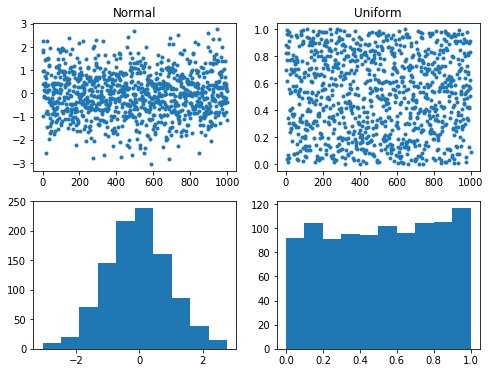

In [2]:
np.random.seed(0)
x0 = np.random.randn(1000)  # normal distribution
x1 = np.random.rand(1000)   # uniform distribution

fig,ax = plt.subplots(2, 2, figsize=(8,6))
ax[0,0].plot(x0, '.');  ax[0,0].set_title('Normal')
ax[0,1].plot(x1, '.');  ax[0,1].set_title('Uniform')
ax[1,0].hist(x0)
ax[1,1].hist(x1)
plt.show()

How can we generate random [correlated](https://en.wikipedia.org/wiki/Correlation_and_dependence) data?

The easiest way is to (1) create perfectly correlated data, then (2) add noise.

This can be achieved as follows:

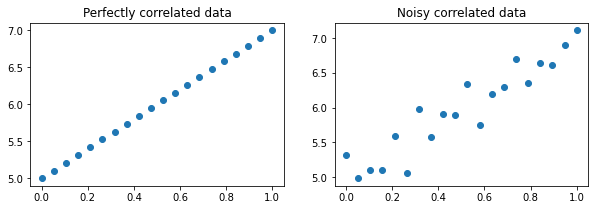

In [3]:
np.random.seed(1)

n  = 20                   # number of data points
x  = np.linspace(0, 1, n) # variable 1
y  = 2 * x + 5            # variable 2 (slope * x + intercept) (perfectly correlated with x)
z  = y + 0.2 * np.random.randn(n) # variable 3 (noisy data, correlated with x)


fig,ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].scatter(x, y)
ax[1].scatter(x, z)
ax[0].set_title('Perfectly correlated data')
ax[1].set_title('Noisy correlated data')
plt.show()

___

## Quantifying correlation strength

One way to quantify correlation strength is to use the [correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ($r$). It can be computed using the `np.corrcoef` function as follows:

In [4]:
np.random.seed(1)

n  = 20
x  = np.linspace(0, 1, n)
y  = (2 * x + 5) + (0.2 * np.random.randn(n)) # (correlated data) + (amplified noise)

R  = np.corrcoef(x, y)

print(R)

[[1.         0.93851743]
 [0.93851743 1.        ]]


Note that the $r$ value is the off-diagonal value: 

In [5]:
r  = R[0,1]
print( 'Correlation coefficient: ', r )

Correlation coefficient:  0.9385174286951853


How do we know that $r$ is a good indicator of correlation strength?

One way to check is to add varying amounts of noise, and to examine how $r$ changes.

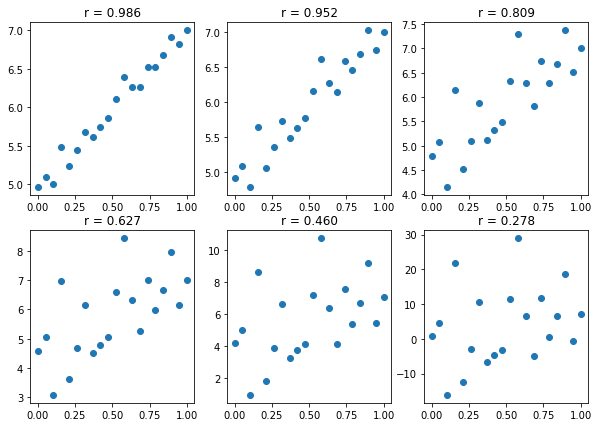

In [6]:
np.random.seed(2)

amp0 = 0.1  # noise amplitude 0
amp1 = 0.2  # noise amplitude 1
amp2 = 0.5  # noise amplitude 2
amp3 = 1.0  # noise amplitude 3
amp4 = 2.0  # noise amplitude 4
amp5 = 10.0 # noise amplitude 5

noise = np.random.randn(n)

y0   = (2 * x + 5) + (amp0 * noise)
y1   = (2 * x + 5) + (amp1 * noise)
y2   = (2 * x + 5) + (amp2 * noise)
y3   = (2 * x + 5) + (amp3 * noise)
y4   = (2 * x + 5) + (amp4 * noise)
y5   = (2 * x + 5) + (amp5 * noise)

r0   = np.corrcoef(x, y0)[0,1]
r1   = np.corrcoef(x, y1)[0,1]
r2   = np.corrcoef(x, y2)[0,1]
r3   = np.corrcoef(x, y3)[0,1]
r4   = np.corrcoef(x, y4)[0,1]
r5   = np.corrcoef(x, y5)[0,1]


fig,ax = plt.subplots(2, 3, figsize=(10,7))
ax[0,0].scatter(x, y0);  ax[0,0].set_title('r = %.3f' %r0)
ax[0,1].scatter(x, y1);  ax[0,1].set_title('r = %.3f' %r1)
ax[0,2].scatter(x, y2);  ax[0,2].set_title('r = %.3f' %r2)
ax[1,0].scatter(x, y3);  ax[1,0].set_title('r = %.3f' %r3)
ax[1,1].scatter(x, y4);  ax[1,1].set_title('r = %.3f' %r4)
ax[1,2].scatter(x, y5);  ax[1,2].set_title('r = %.3f' %r5)
plt.show()


We can see that $r$ approaches 1.0 as correlation strengthens, and that $r$ approaches zero as correlation weakens.

However, small-amplitude noise does not imply strong correlation. Consider the following case:

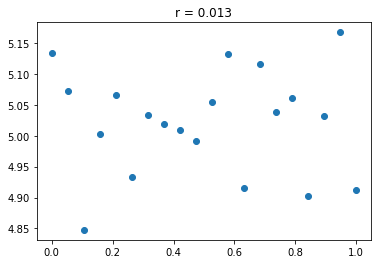

In [7]:
np.random.seed(10)

n  = 20
x  = np.linspace(0, 1, n)
y  = (0.02 * x + 5) + (0.1 * np.random.randn(n)) # (correlated data) + (amplified noise)
r  = np.corrcoef(x, y)[0,1]

plt.figure()
plt.scatter(x, y)
plt.title('r = %.3f' %r)
plt.show()


Thus the correlation depends on both (a) the noise amplitude, and (b) the slope of the the underlying true (perfect) correlation.

Note that negative correlation and negative $r$ values are also possible when the slope of the underlying true correlation is negative:

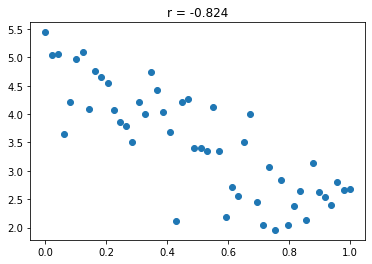

In [8]:
np.random.seed(20)

n  = 50
x  = np.linspace(0, 1, n)
y  = (-3 * x + 5) + (0.5 * np.random.randn(n))
r  = np.corrcoef(x, y)[0,1]

plt.figure()
plt.scatter(x, y)
plt.title('r = %.3f' %r)
plt.show()

___

## Other functions for calculating the correlation coefficient

The `stats.linregress` function can also be used to calculate the correlation coefficient as follows:

In [9]:
results = stats.linregress(x, y)

print(results)

LinregressResult(slope=-2.6885920562560117, intercept=4.853830145513385, rvalue=-0.8238394408057876, pvalue=2.0168760969903524e-13, stderr=0.2669988276407451)


Note that the correlation coefficient is saved in the `rvalue` attribute of `results`:

In [10]:
r1 = results.rvalue
print(r1)

-0.8238394408057876


Note also that `np.correcoef` and `stats.linregress` produce the same results:

In [11]:
r0  = np.corrcoef(x, y)[0,1]
r1  = stats.linregress(x, y).rvalue

print('(np.corrcoef)      r = %.5f' %r0)
print('(stats.linregress) r = %.5f' %r1)

(np.corrcoef)      r = -0.82384
(stats.linregress) r = -0.82384


A number of other functions in a variety of Python packages can be used to similarly calculate correlation coefficients.

Which function is best to use?

One way to answer this question is to check the amount of time required to run these functions...

___

## Outliers

Occasionally [outliers](https://en.wikipedia.org/wiki/Outlier) appear in datasets. Outliers can greatly affect correlation results. Consider the following two datasets.  The first has no outliers. The second is the same as the first, but with one extreme outlier.

0.9607201119140113 -0.266337657242094


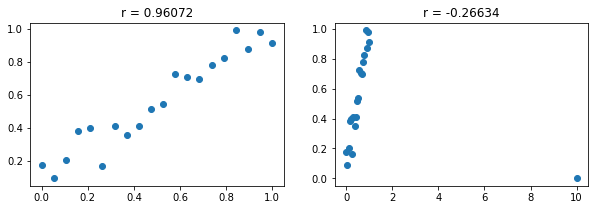

In [12]:
np.random.seed(0)
n   = 20
x0  = np.linspace(0, 1, n)
y0  = x0 + (0.1 * np.random.randn(n))

x1  = np.append(x0, 10)
y1  = np.append(y0, 0)

r0  = np.corrcoef(x0, y0)[0,1]
r1  = np.corrcoef(x1, y1)[0,1]

print(r0, r1)

fig,ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].scatter(x0, y0)
ax[1].scatter(x1, y1)
ax[0].set_title('r = %.5f' %r0)
ax[1].set_title('r = %.5f' %r1)
plt.show()

Note that the outlier at position (10,0) has not only weakened the correlation, but has also changed the correlation from **positive** to **negative**.

It is therefore very important to check for outliers and remove them whenever possible.

One way to remove outliers is to use [boolean indexing](https://www.python-course.eu/numpy_masking.php). First create an array of all **True** values, then set the values of the outliers to **False** like this:

In [13]:
b = np.array( [True]*x1.size )  # boolean array (all True values)
print(b)
print()

b[-1] = False  # boolean array (last value is False)
print(b)
print()

x1new = x1[b]  # remove the final element using boolean indexing
y1new = y1[b]  # remove the final element using boolean indexing

r1new = np.corrcoef(x1new, y1new)[0,1]

print(r1new)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False]

0.9607201119140113


___

## Confounding factors

In addition to outliers, [confounding factors](https://en.wikipedia.org/wiki/Confounding) can affect $r$ values and correlation interpretations.

Consider the following dataset, in which two different correlations actually exist simultaneously:

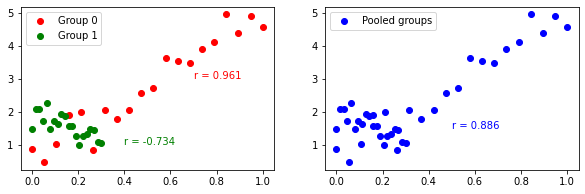

In [14]:
np.random.seed(0)

n  = 20
x0 = np.linspace(0, 1, n)   # Group 0 independent variable (IV)
x1 = np.linspace(0, 0.3, n) # Group 1 independent variable (IV) 
y0 =  5*x0 + 0 + (0.5 * np.random.randn(n))  # Group 0 dependent variable (DV)
y1 = -3*x1 + 2 + (0.2 * np.random.randn(n))  # Group 1 dependent variable (DV)

x  = np.hstack([x0,x1])  # Pooled IV (groups pooled together into one analysis)
y  = np.hstack([y0,y1])  # Pooled DV (groups pooled together into one analysis)


r0 = np.corrcoef(x0, y0)[0,1]  # Group 0 correlation
r1 = np.corrcoef(x1, y1)[0,1]  # Group 1 correlation
r  = np.corrcoef(x, y)[0,1]    # Pooled correlation


fig,ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].scatter(x0, y0, color='r', label='Group 0')
ax[0].scatter(x1, y1, color='g', label='Group 1')
ax[0].legend()
ax[0].text(0.7, 3, 'r = %.3f' %r0, color='r')
ax[0].text(0.4, 1, 'r = %.3f' %r1, color='g')

ax[1].scatter(x, y, color='b', label='Pooled groups')
ax[1].legend()
ax[1].text(0.5, 1.5, 'r = %.3f' %r, color='b')
plt.show()


If the groups are pooled together, like in the panel on the right, a relatively strong **positive** correlation is observed, but Group 1 actually has a true **negative** correlation.

It is therefore important to eliminate confounding factors wherever possible.

___

## Correlation vs. relation

"Not correlated" does not mean "not related".

Consider the following dataset:

In [15]:
x = [-20, -10, 0, 10, 20]
y = [20.1, 9.9, 0, 10.1, 19.9]

r = np.corrcoef(x, y)[0,1]

print(r)

-0.0037793747843912107


The $r$ value is close to zero, implying close-to-no correlation. However, there clearly is a **relation** between $x$ and $y$. The $y$ values are close to the absolute $x$ values.

Here is a similar, more realistic example:

-0.0006240780062614028


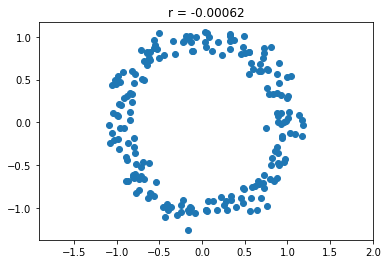

In [16]:
np.random.seed(0)

n = 200
theta = np.linspace(0, 20*np.pi, n)
x     = np.cos(theta) + 0.1 * np.random.randn(n)
y     = np.sin(theta) + 0.1 * np.random.randn(n)


r = np.corrcoef(x, y)[0,1]
print(r)

plt.figure()
plt.scatter(x, y)
plt.axis('equal')
plt.title('r = %.5f' %r)
plt.show()


Like above, the **correlation** between $x$ and $y$ is close to zero, but clearly $x$ and $y$ are **related**.

___

## Correlation vs. causation

A **correlation** between two variables does not necessarily mean that one causes the other.

For example, consider the example below, which follows a [similar example](https://pastafarians.org.au/pastafarianism/pirates-and-global-warming/) from the internet.

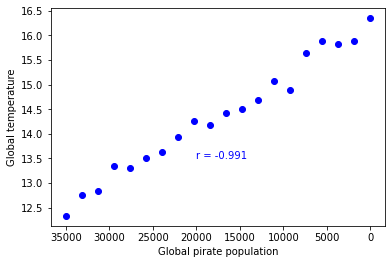

In [17]:
np.random.seed(0)

n           = 20
num_pirates = np.linspace(20, 35000, n)
temperature = -0.0001 * num_pirates + 16 + (0.2 * np.random.randn(n))
r           = np.corrcoef(num_pirates, temperature)[0,1]

plt.figure()
ax = plt.axes()
ax.scatter(num_pirates, temperature, color='b')
ax.invert_xaxis()
ax.set_xlabel('Global pirate population')
ax.set_ylabel('Global temperature')
ax.text(20000, 13.5, 'r = %.3f' %r, color='b')
plt.show()


This absurd example suggests that the there is a negative correlation between the global pirate population and the global temperature.

If you believe that correlation implies causation, you would interpret these results to mean:

* The decreasing number of pirates has caused global warming
* Increasing the number of pirates will cool the Earth

This is, of course, an absurd example.  The underlying point is nevertheless very important: **correlation**, by itself, must never be interpreted as **causation**.

___

## Regression lines

Regression lines (i.e., the lines which best fit the data) can be superimposed on scatter plots as follows.

First, recognize that a line can be represented as:

<center>$y = a x + b$</center>

The values for $a$ and $b$ can be calculated in a variety of ways. One way is to use the [np.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) function.

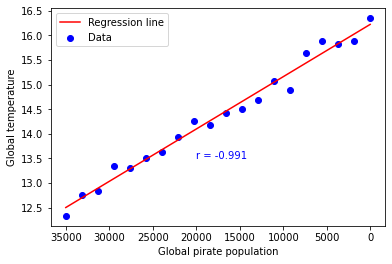

In [18]:
np.random.seed(0)

# Create dataset:
n           = 20
num_pirates = np.linspace(20, 35000, n)
temperature = -0.0001 * num_pirates + 16 + (0.2 * np.random.randn(n))


# Calculate correlation strength:
r           = np.corrcoef(num_pirates, temperature)[0,1]


# Calculate regression line:
a, b        = np.polyfit(num_pirates, temperature, deg=1)
x0          = min(num_pirates)  # x coordinate of first point
x1          = max(num_pirates)  # x coordinate of second point
y0          = a*x0 + b   # y coordinate of first point
y1          = a*x1 + b   # y coordinate of second point


# Plot results:
plt.figure()
ax = plt.axes()
ax.scatter(num_pirates, temperature, color='b', label='Data')
ax.invert_xaxis()
ax.set_xlabel('Global pirate population')
ax.set_ylabel('Global temperature')
ax.text(20000, 13.5, 'r = %.3f' %r, color='b')
ax.plot([x0,x1], [y0,y1], color='r', label='Regression line')
ax.legend()
plt.show()
